In [119]:
import pandas as pd
import numpy as np
df = pd.read_csv('교통사고현황.csv')
df

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
114438,2019-12-31,22,서울,송파구,송파동,1,0,0,1,0
114439,2019-12-31,22,서울,영등포구,대림동,1,0,0,1,0
114440,2019-12-31,22,서울,중랑구,면목동,1,0,0,0,1
114441,2019-12-31,23,서울,강남구,수서동,1,0,0,1,0


In [120]:
df = pd.DataFrame(df)
df = df.groupby('발생일').sum().reset_index( level = '발생일' )
df

,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,734,73,2,25,90,10
1,2017-01-02,1118,82,4,27,92,17
2,2017-01-03,1148,88,1,25,80,13
3,2017-01-04,1409,115,1,39,99,25
4,2017-01-05,1269,103,1,34,111,8
...,...,...,...,...,...,...,...
1090,2019-12-27,1305,94,0,27,88,14
1091,2019-12-28,1150,94,0,27,105,10
1092,2019-12-29,1024,78,1,26,87,7
1093,2019-12-30,1281,91,1,19,93,53


In [121]:
df_18 = df[df['발생일'].str.contains('2018')]
df_18 = df_18.reset_index()
df_18

,index,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,365,2018-01-01,643,67,1,32,61,7
1,366,2018-01-02,1039,78,0,29,58,4
2,367,2018-01-03,866,72,2,28,59,11
3,368,2018-01-04,1086,81,3,27,65,4
4,369,2018-01-05,1332,94,1,35,82,16
...,...,...,...,...,...,...,...,...
360,725,2018-12-27,1599,115,0,24,116,15
361,726,2018-12-28,1492,113,0,20,132,7
362,727,2018-12-29,1037,86,1,29,93,6
363,728,2018-12-30,853,69,2,28,77,15


In [122]:
df_aci18 = pd.DataFrame({'date' : df_18['발생일'],
                      'count' : df_18['사고건수']})
df_aci18

,date,count
0,2018-01-01,67
1,2018-01-02,78
2,2018-01-03,72
3,2018-01-04,81
4,2018-01-05,94
...,...,...
360,2018-12-27,115
361,2018-12-28,113
362,2018-12-29,86
363,2018-12-30,69


---

---

In [47]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import copy

In [6]:
date_list = list()
weather_list = list()

In [7]:
def get_address(adress):           #5주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(5):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

In [8]:
def get_address6(adress):           #6주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(6):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

In [9]:
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=1&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=2&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=3&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=4&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=5&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=6&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=7&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=8&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=9&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=10&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=11&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=12&obs=9')

print(date_list)
print(weather_list)

['1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '

In [123]:
#날씨정보 crawling
df_wea18 = pd.DataFrame({'date2' : date_list,
                       'weather' : weather_list})

df_wea18

,date2,weather
0,1일,
1,2일,달무리
2,3일,달무리
3,4일,햇무리 채운
4,5일,햇무리
...,...,...
360,27일,
361,28일,
362,29일,
363,30일,


In [124]:
#day2 삭제 전 df
df_plus18 = pd.concat([df_aci18, df_wea18], axis = 1)
df_plus18

,date,count,date2,weather
0,2018-01-01,67,1일,
1,2018-01-02,78,2일,달무리
2,2018-01-03,72,3일,달무리
3,2018-01-04,81,4일,햇무리 채운
4,2018-01-05,94,5일,햇무리
...,...,...,...,...
360,2018-12-27,115,27일,
361,2018-12-28,113,28일,
362,2018-12-29,86,29일,
363,2018-12-30,69,30일,


In [125]:
df_dropdate18 = df_plus18.drop(['date2'], axis = 1)
df18 = copy.deepcopy(df_dropdate18)

In [126]:
day_list = list()
day = 1
for i in range(365):
    if day%7 == 0:
        day_list.append('일요일')
    elif day%7 == 1:
        day_list.append('월요일')
    elif day%7 == 2:
        day_list.append('화요일')
    elif day%7 == 3:
        day_list.append('수요일')
    elif day%7 == 4:
        day_list.append('목요일')
    elif day%7 == 5:
        day_list.append('금요일')
    elif day%7 == 6:
        day_list.append('토요일')
    day += 1
    
#day_list
len(day_list)

365

In [127]:
#day 열 생성 ( 요일데이터 ) 
df18['day'] = day_list
df18

,date,count,weather,day
0,2018-01-01,67,,월요일
1,2018-01-02,78,달무리,화요일
2,2018-01-03,72,달무리,수요일
3,2018-01-04,81,햇무리 채운,목요일
4,2018-01-05,94,햇무리,금요일
...,...,...,...,...
360,2018-12-27,115,,목요일
361,2018-12-28,113,,금요일
362,2018-12-29,86,,토요일
363,2018-12-30,69,,일요일


In [128]:
mon18 = df18[df18.day.str.contains('월')]['count'].sum()
tue18 = df18[df18.day.str.contains('화')]['count'].sum()
wed18 = df18[df18.day.str.contains('수')]['count'].sum()
thu18 = df18[df18.day.str.contains('목')]['count'].sum()
fri18 = df18[df18.day.str.contains('금')]['count'].sum()
sat18 = df18[df18.day.str.contains('토')]['count'].sum()
sun18 = df18[df18.day.str.contains('일요')]['count'].sum()

print(mon18, tue18, wed18, thu18, fri18, sat18, sun18)

5493 5485 5664 5852 6295 5812 4194


In [129]:
# 비온날의 총 합
# 100
rainday18 = df18[df18.weather.str.contains('비')]

rainday18 = rainday18.reset_index()

tot_rainday18 = 108 - 8 #비눈같이온날 마이너스
rainday18 = rainday18.drop(['index'], axis = 1)
rainday18

,date,count,weather,day
0,2018-01-15,117,비 박무 연무,월요일
1,2018-01-16,103,비 연무,화요일
2,2018-01-18,99,비 진눈깨비 박무 연무,목요일
3,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
4,2018-02-28,129,비 진눈깨비 박무 연무,수요일
...,...,...,...,...
103,2018-11-21,98,비 박무,수요일
104,2018-11-24,112,눈 진눈깨비 박무,토요일
105,2018-12-03,115,비 안개비 안개 박무,월요일
106,2018-12-04,99,비 안개비 안개 박무,화요일


In [130]:
#비, 눈 같이온날 8일
rainsnowday18 = rainday18[rainday18.weather.str.contains('눈')]
rainsnowday18 = rainsnowday18.reset_index()
tot_rainsnowday18 = 8
rainsnowday18

,index,date,count,weather,day
0,2,2018-01-18,99,비 진눈깨비 박무 연무,목요일
1,3,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
2,4,2018-02-28,129,비 진눈깨비 박무 연무,수요일
3,5,2018-03-01,108,비 진눈깨비 박무,목요일
4,14,2018-03-21,90,눈 진눈깨비,수요일
5,19,2018-04-07,133,비 눈 진눈깨비 연무,토요일
6,104,2018-11-24,112,눈 진눈깨비 박무,토요일
7,107,2018-12-16,72,비 눈 싸락눈 박무 연무,일요일


In [131]:
#비눈같이온날 사고의 합
tot_rainsnowaci18 = rainsnowday18['count'].sum()
tot_rainsnowaci18

840

In [132]:
#비온날 사고의 총 합
tot_rainaci18 = df18[df18.weather.str.contains('비')]['count'].sum()
tot_rainaci18 = tot_rainaci18 - tot_rainsnowaci18
tot_rainaci18

10670

In [133]:
#눈온날의 총 합
snowday18 = df18[df18.weather.str.contains('눈')]

snowday18 = snowday18.reset_index()

tot_snowday18 = 23 - 8 #비눈 같이온날 마이너스
snowday18 = snowday18.drop(['index'], axis = 1)
snowday18

,date,count,weather,day
0,2018-01-08,97,눈 박무 연무,월요일
1,2018-01-09,100,눈 연무,화요일
2,2018-01-10,146,눈,수요일
3,2018-01-12,157,눈,금요일
4,2018-01-13,133,눈 박무 연무,토요일
5,2018-01-18,99,비 진눈깨비 박무 연무,목요일
6,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
7,2018-01-30,115,눈,화요일
8,2018-01-31,118,눈 박무,수요일
9,2018-02-03,151,눈,토요일


In [134]:
#눈온날 사고의 총 합
tot_snowaci18 = df18[df18.weather.str.contains('눈')]['count'].sum()
tot_snowaci18 = tot_snowaci18 - tot_rainsnowaci18
tot_snowaci18

1893

In [135]:
tot_normalday18 = 365 - tot_rainday18 - tot_snowday18 - tot_rainsnowday18
tot_normalday18

242

In [136]:
tot_aci18 = df18['count'].sum()
print(tot_aci18)

tot_normalaci18 = tot_aci18 - tot_rainaci18 - tot_snowaci18 - tot_rainsnowaci18
print(tot_normalaci18)

38795
25392


In [137]:
avg_normal18 = tot_normalaci18 / tot_normalday18
avg_rain18 = tot_rainaci18 / tot_rainday18
avg_snow18 = tot_snowaci18 / tot_snowday18
avg_rainsnow18 = tot_rainsnowaci18 / tot_rainsnowday18

print(avg_normal18)
print(avg_rain18)
print(avg_snow18)
print(avg_rainsnow18)

104.92561983471074
106.7
126.2
105.0


In [25]:
from matplotlib import font_manager, rc
font_path = "../data/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<function matplotlib.pyplot.show(close=None, block=None)>

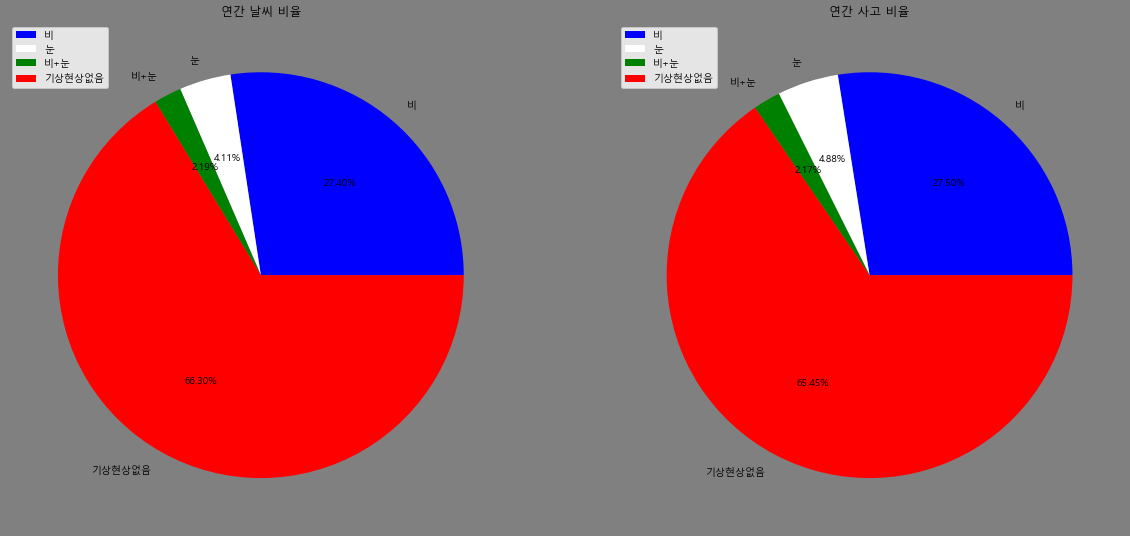

In [138]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (20, 20), facecolor = 'grey')
#pie 차트
plt.subplot(1, 2, 1)
plt.pie([tot_rainday18, tot_snowday18, tot_rainsnowday18, tot_normalday18], labels = ['비', '눈', '비+눈', '기상현상없음'], colors = ['blue', 'white', 'green', 'red'], autopct = '%.2f%%')
plt.title('연간 날씨 비율')
plt.legend()
plt.show

plt.subplot(1, 2, 2)
#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.pie([tot_rainaci18, tot_snowaci18, tot_rainsnowaci18, tot_normalaci18], labels = ['비', '눈', '비+눈', '기상현상없음'], colors = ['blue', 'white', 'green', 'red'], autopct = '%.2f%%')
plt.title('연간 사고 비율')
plt.legend()
plt.show

<BarContainer object of 4 artists>

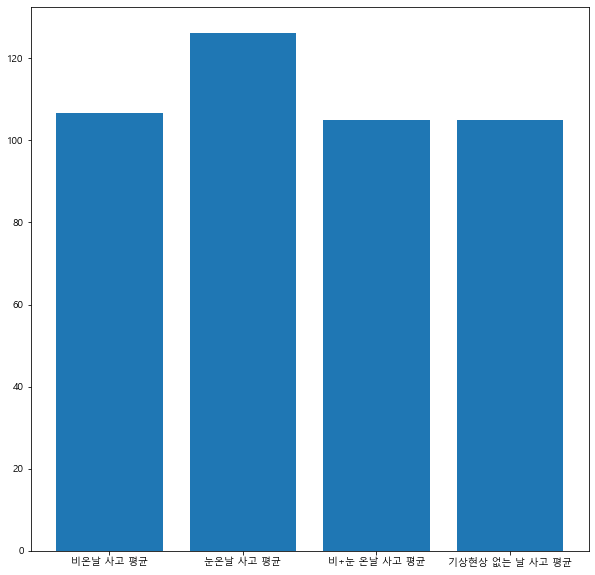

In [139]:
#날씨별 평균 사고량
plt.figure(figsize = (10, 10))
plt.bar(['비온날 사고 평균', '눈온날 사고 평균', '비+눈 온날 사고 평균', '기상현상 없는 날 사고 평균'], [avg_rain18, avg_snow18, avg_rainsnow18, avg_normal18])

<BarContainer object of 7 artists>

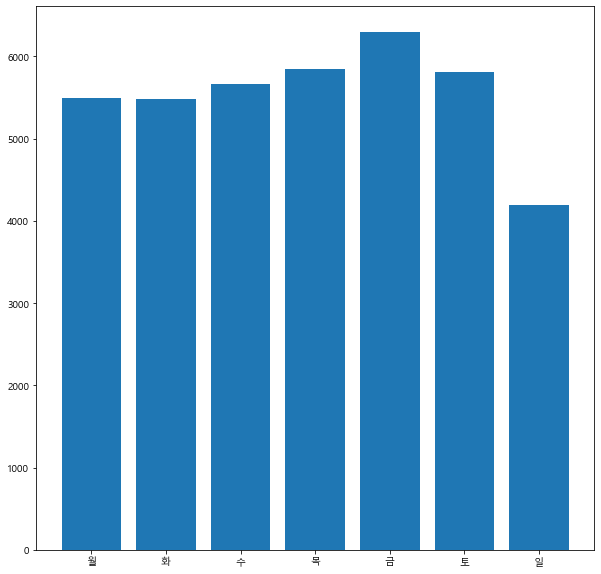

In [140]:
#요일별 평균 사고량
plt.figure(figsize = (10, 10))
plt.bar(['월', '화', '수', '목', '금', '토', '일'], [mon18, tue18, wed18, thu18, fri18, sat18 ,sun18])

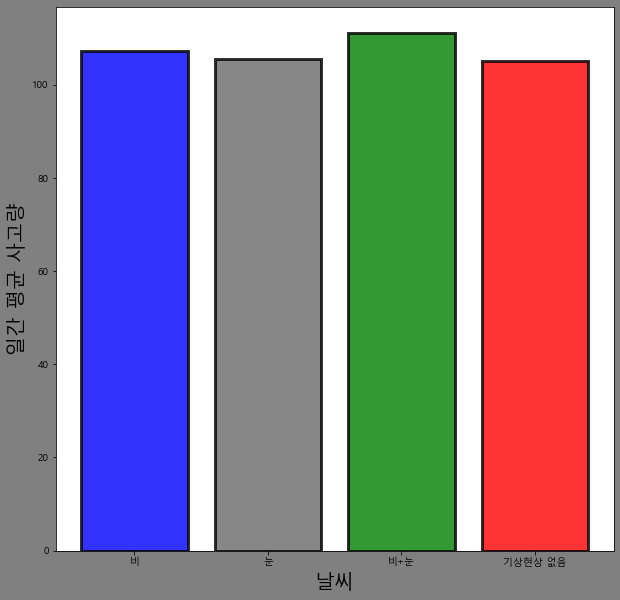

In [30]:
#날씨별 평균 사고량
import seaborn as sns
fig = plt.figure(figsize = (10, 10), facecolor = 'grey')

plt.bar(['비', '눈', '비+눈', '기상현상 없음'], [avg_rain17, avg_snow17, avg_rainsnow17, avg_normal17], color = ['blue', 'dimgray', 'green', 'red'], edgecolor='black', alpha=0.8, linewidth=3)
plt.xlabel('날씨', fontsize=20)
plt.ylabel('일간 평균 사고량', fontsize=20)
plt.show()